In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9827 non-null   int32  
 1   Title         9827 non-null   object 
 2   Popularity    9827 non-null   float64
 3   Vote_Count    9827 non-null   int64  
 4   Vote_Average  9827 non-null   float64
 5   Genre         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 422.4+ KB


In [34]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.0,9827.000000,9827.000000,9827.000000
mean,1970.0,40.326088,1392.805536,6.439534
std,0.0,108.873998,2611.206907,1.129759
min,1970.0,13.354000,0.000000,0.000000
25%,1970.0,16.128500,146.000000,5.900000
50%,1970.0,21.199000,444.000000,6.500000
75%,1970.0,35.191500,1376.000000,7.100000
max,1970.0,5083.954000,31077.000000,10.000000


In [37]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [38]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,1970,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,1970,No Exit,2618.087,122,6.3,Thriller
3,1970,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,1970,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [40]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,1970,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,1970,No Exit,2618.087,122,6.3,Thriller
3,1970,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,1970,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [41]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols,axis=1,inplace=True)
df.columns

KeyError: "['Overview', 'Original_Language', 'Poster_Url'] not found in axis"

In [ ]:
df.head()

In [ ]:
def catigorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
    df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df
    

In [43]:
labels=['not_popular','below_avg','average','popular']
catigorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [44]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [45]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [46]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,1970,The Batman,3827.658,1151,popular,Crime
4,1970,The Batman,3827.658,1151,popular,Mystery


In [47]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [49]:
df.nunique()

Release_Date       1
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [50]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

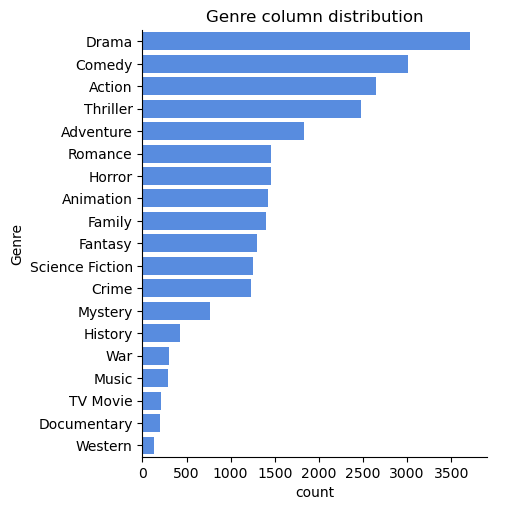

In [54]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title('Genre column distribution')
plt.show()

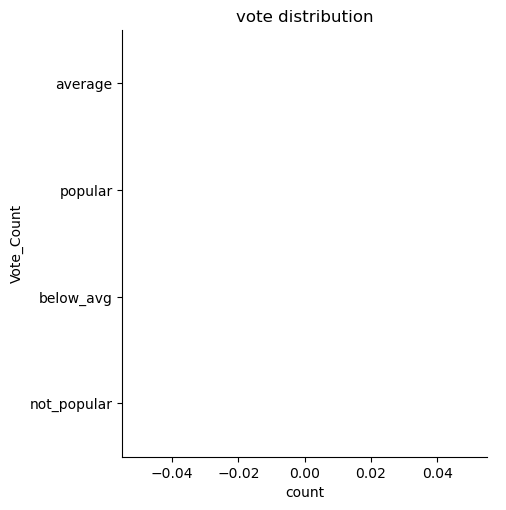

In [56]:
sns.catplot(y='Vote_Count',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#4287f5')
plt.title('vote distribution')
plt.show()